# GAN (Generative Adversarial Network)

**GAN :**
What is a Generative Adversarial Network?

A generative adversarial network, or GAN, is a deep neural network framework which is able to learn from a set of training data and generate new data with the same characteristics as the training data. For example, a generative adversarial network trained on photographs of human faces can generate realistic-looking faces which are entirely fictitious.

A generative adversarial network is made up of two neural networks:

1.Generator Model: Used to generate new images which look like real images.

2.Discriminator Model: Used to classify images as real or fake.

# The Generator Model


```
The Generator Model generates new images by taking a fixed size random noise as an input.
Generated images are then fed to the Discriminator Model.

The main goal of the Generator is to fool the Discriminator by generating images that look
like real images and thus makes it harder for the Discriminator to classify images as real or fake.
```



# The Discriminator Model



```
The Discriminator Model takes an image as an input (generated and real) and classifies it as real or fake.

Generated images come from the Generator and the real images come from the training data.

The discriminator model is the simple binary classification model.
```



## Generative Adversarial Network Architecture

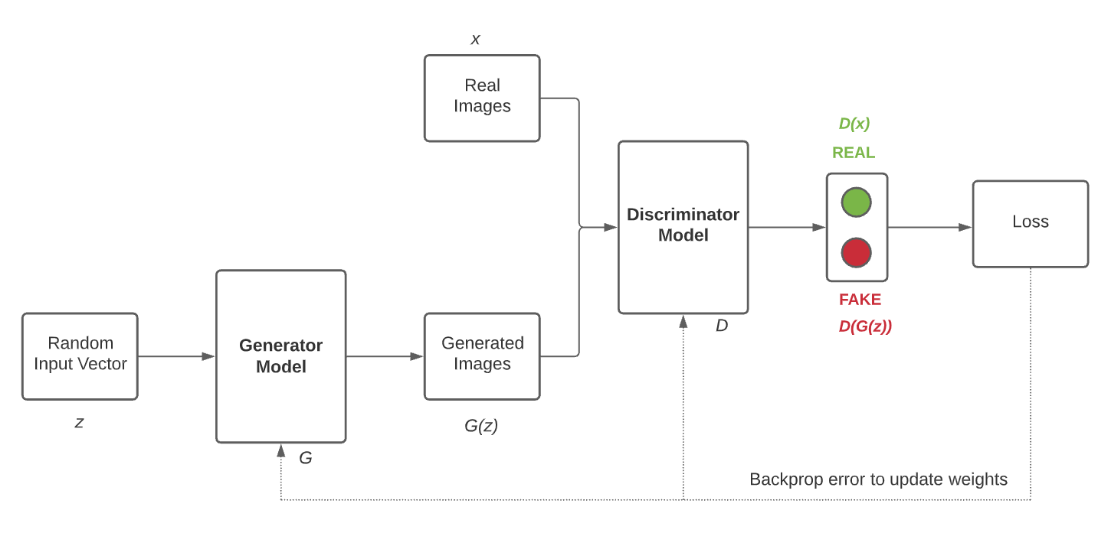

# Must Remember !!!!

```
The Generator Model G takes a random input vector z as an input and generates the images G(z).

These generated images along with the real images x from training data are then fed to the Discriminator Model D.

The Discriminator Model then classifies the images as real or fake.

Then,  we have to measure the loss and this loss has to be back propagated to update the weights of  the Generator and the Discriminator.
```



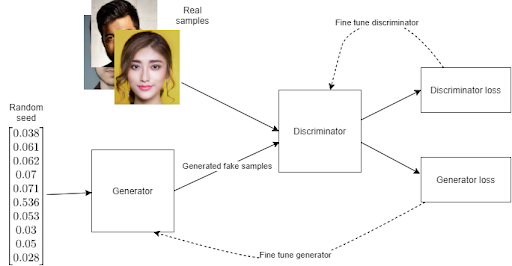



```
When we are training the Discriminator, we have to freeze the Generator and back propagate errors to only update the Discriminator.

When we are training the Generator, we have to freeze the Discriminator and back propagate errors to only update the Generator.

Thus the Generator Model and the Discriminator Model getting better and better at each epoch.

We have to stop training when it attains the Nash Equilibrium or D(x) = 0.5 for all x.

In simple words, when the generated images look almost like real images.
```



Terminology in GAN'S


```
Let us introduce some notations to understand the loss function of the GANs.

G	Generator Model
D	Discriminator Model
z	Random Noise (Fixed size input vector)
x	Real Image
G(z)	Image generated by Generator (Fake Image)
pdata(x)	Probability Distribution of Real Images
pz(z)	Probability Distribution of Fake Images
D(G(z))	Discriminator’s output when the generated image is an input
D(x)	Discriminator’s output when the real image is an input
```



The fight between the Generator Model and the Discriminator Model can be expressed mathematically as:
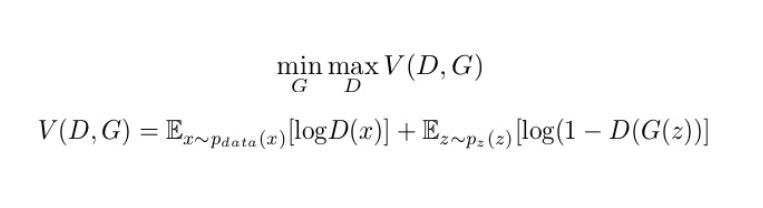

Note: The term Ex~pdata(x) [log D(x)] can be read as E of log(D(x)) when x is sampled from pdata(x) and similar for the second term.

As we can see in the equation, the Generator wants to minimize the V(D, G) whereas the  Discriminator wants to maximize the V(D, G). Let us understand both terms:

1.Ex~pdata(x) [log D(x)]: Average log probability of D when real image is input.

2.Ez~pz(z) [log(1 – D(G(z)))]: Average log probability of D when the generated image is input.

Now It's time to listen their problems perspective



**Discriminator’s perspective**
```
The Discriminator wants to maximize the loss function V(D, G) by correctly classifying real and fake images.

The first term suggests that the Discriminator wants to make D(x) as close to 1 as possible,
i.e. correctly classifying real images as real.

The second term suggests that the Discriminator wants to make D(G(x)) as close to 0 as possible,
 i.e. correctly classifying fake images as fake and thus maximize the term eventually (1 – smaller number will result in a larger number)

Note: Probability lies in the range of 0-1

```





Thus, The Discriminator tries to maximize both the terms.

**Generator’s perspective**


```
The Generator wants to minimize the loss function V(D, G) by generating images that look like real images and tries to fool the Discriminator.

The second term suggests that the Generator wants to make D(G(z)) as close to 1 (instead of 0) as possible and
thus minimize the term eventually (1 – larger number will result in a smaller number).

So that the Discriminator fails and misclassifies the images.
```




Thus, The Generator tries to minimize the second term.

The Above game is called **min-max game**

In [ ]:
#import necessary libraries
import keras
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#print the shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#60000 images of 28x28 grayscale

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
from matplotlib import pyplot as plt

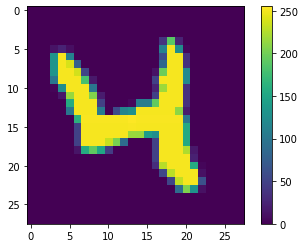

In [ ]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Creating class label array
class_names = ['Zero', 'one', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

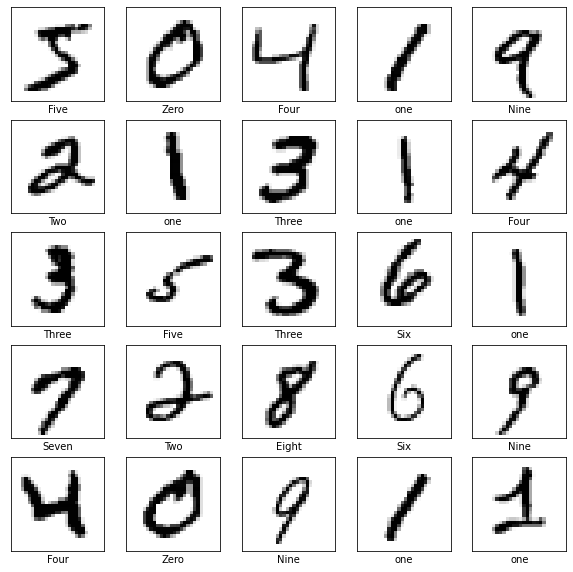

In [ ]:
# Display the first 25 images from the training set and display the class name below each image.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import (Dense,
                                     BatchNormalization,
                                     LeakyReLU,
                                     Reshape,
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# underscore to omit the label arrays
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()


train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

127.5 = 255 / 2. Pixels are frequently represented as colors using a range from 0-255. This is exactly the middle of that range. So every pixel color is being adjusted to be between -1 and 1

In [ ]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    print(model.summary())

    return model


This is due to the fact that when generating the images, they are typically normalized to be either in the range [0,1] or [-1,1]. So if you want your output images to be in [0,1] you can use a sigmoid and if you want them to be in [-1,1] you can use tanh. You can always use ReLU but you only have the garantee of it being non negative and not in a given range.

In [ ]:

generator = generator_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 128)        5

Generator

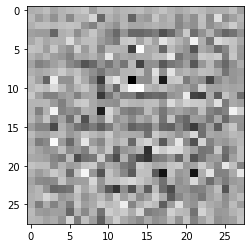

In [ ]:
# Create a random noise and generate a sample
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
# Visualize the generated sample
plt.imshow(generated_image[0, :, :, 0], cmap='gray')


In [ ]:
def discriminator_model():
    model = tf.keras.Sequential()

    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    print(model.summary())

    return model

In [ ]:
discriminator = discriminator_model()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)




```
Checkpoints capture the exact value of all parameters (tf.Variable objects)
used by a model.
Checkpoints do not contain any description of the computation defined by
the model and thus are typically only useful when source code that
will use the saved parameter values is available.
```



 seed() method is used to initialize the pseudo-random number generator of Python which generates the random values.

In [ ]:
EPOCHS = 60
# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
num_examples_to_generate = 16
noise_dim = 100
seed = tf.random.normal([num_examples_to_generate, noise_dim])


tf.function is a decorator function provided by Tensorflow 2.0 that converts regular python code to a callable Tensorflow graph function, which is usually more performant and python independent. It is used to create portable Tensorflow models.
[link text](https://www.machinelearningplus.com/deep-learning/how-use-tf-function-to-speed-up-python-code-tensorflow/)

In [ ]:
# tf.function annotation causes the function
# to be "compiled" as part of the training
@tf.function
def train_step(images):

    # 1 - Create a random noise to feed it into the model
    # for the image generation
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    # 2 - Generate images and calculate loss values
    # GradientTape method records operations for automatic differentiation.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # 3 - Calculate gradients using loss values and model variables
    # "gradient" method computes the gradient using
    # operations recorded in context of this tape (gen_tape and disc_tape).

    # It accepts a target (e.g., gen_loss) variable and
    # a source variable (e.g.,generator.trainable_variables)
    # target --> a list or nested structure of Tensors or Variables to be differentiated.
    # source --> a list or nested structure of Tensors or Variables.
    # target will be differentiated against elements in sources.

    # "gradient" method returns a list or nested structure of Tensors
    # (or IndexedSlices, or None), one for each element in sources.
    # Returned structure is the same as the structure of sources.
    gradients_of_generator = gen_tape.gradient(gen_loss,
                                               generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss,
                                                discriminator.trainable_variables)

    # 4 - Process  Gradients and Run the Optimizer
    # "apply_gradients" method processes aggregated gradients.
    # ex: optimizer.apply_gradients(zip(grads, vars))
    """
    Example use of apply_gradients:
    grads = tape.gradient(loss, vars)
    grads = tf.distribute.get_replica_context().all_reduce('sum', grads)
    # Processing aggregated gradients.
    optimizer.apply_gradients(zip(grads, vars), experimental_aggregate_gradients=False)
    """
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  # 1 - Generate images
  predictions = model(test_input, training=False)
  # 2 - Plot the generated images
  fig = plt.figure(figsize=(4,4))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  # 3 - Save the generated images
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()


In [ ]:
import time
from IPython import display # A command shell for interactive computing in Python.

def train(dataset, epochs):
  # A. For each epoch, do the following:
  for epoch in range(epochs):
    start = time.time()
    # 1 - For each batch of the epoch,
    for image_batch in dataset:
      # 1.a - run the custom "train_step" function
      # we just declared above
      train_step(image_batch)

    # 2 - Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 3 - Save the model every 5 epochs as
    # a checkpoint, which we will use later
    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # 4 - Print out the completed epoch no. and the time spent
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # B. Generate a final image after the training is completed
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)


In [ ]:
noise = tf.random.normal([BATCH_SIZE, noise_dim])

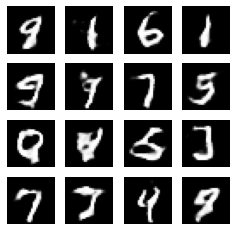

In [ ]:
train(train_dataset, EPOCHS)


In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


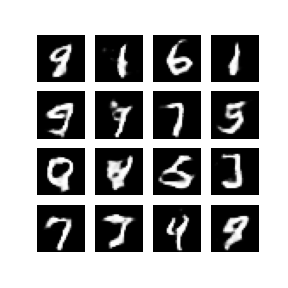

In [ ]:

# PIL is a library which may open different image file formats
import PIL
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)


In [ ]:
from PIL import Image
import IPython
from IPython.display import Image

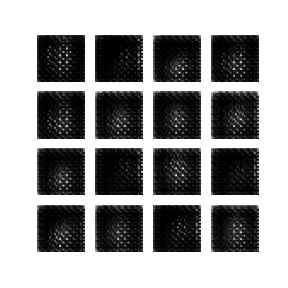

In [ ]:

import glob # The glob module is used for Unix style pathname pattern expansion.
import imageio # The library that provides an easy interface to read and write a wide range of image data

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  # image = imageio.imread(filename)
  # writer.append_data(image)

display.Image(open('dcgan.gif','rb').read())